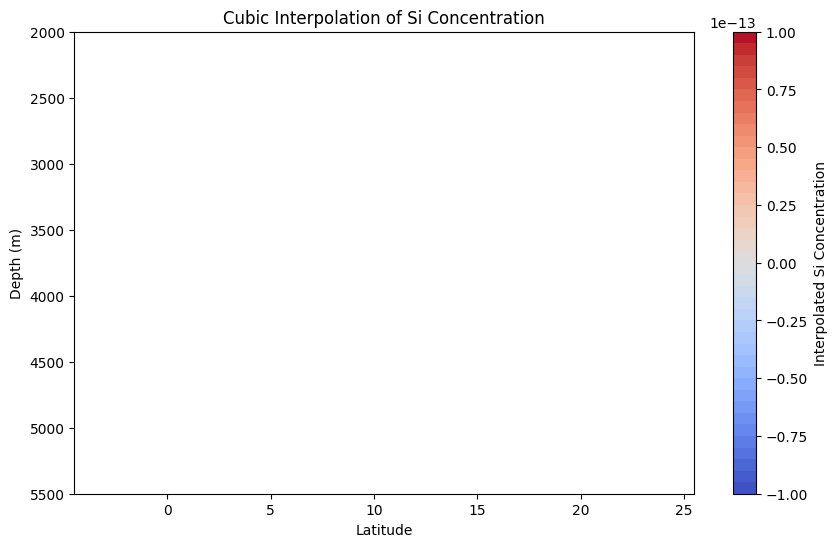

In [1]:
import numpy as np    
import pandas as pd    
import matplotlib.pyplot as plt  
import os  
import cartopy.crs as ccrs  
import cartopy.feature as cfeature  
import matplotlib.ticker as mticker  
from matplotlib.ticker import MultipleLocator, FuncFormatter
import xarray as xr
from matplotlib.colors import Normalize
from scipy.interpolate import griddata

# 读取数据
df = xr.open_dataset(r'../../data/WOA_2023/1965-Now_Annual_si/1_woa23_all_i00_01.nc', decode_times=False)
df = df.sel(time=3894, method='nearest')
df = df.rename({'i_an':'P'})
df = df.where(df['depth']>=2000, drop=True)

# 选择经度
selectec_lon_1 = 129.5
selectec_lon_2 = 130.5
df_lon_1 = df.sel(lon=selectec_lon_1)
df_lon_2 = df.sel(lon=selectec_lon_2)
p_1 = df_lon_1['P']
p_2 = df_lon_2['P']
si = (p_1 + p_2) / 2

# 获取纬度和深度
lat_1 = df['lat'].values
depth_1 = df['depth'].values

# 确保 lat_1 和 depth_1 的形状一致
lat_1 = np.repeat(lat_1, len(depth_1))
depth_1 = np.tile(depth_1, len(lat_1) // len(depth_1))

# 创建网格
xi_1 = np.linspace(lat_1.min(), lat_1.max(), 100)
yi_1 = np.linspace(depth_1.min(), depth_1.max(), 100)
xi_1, yi_1 = np.meshgrid(xi_1, yi_1)

# 对 si 进行 cubic 插值
si_interp = griddata((lat_1, depth_1), si.values.flatten(), (xi_1, yi_1), method='cubic')

# 绘制插值后的数据
fig, ax = plt.subplots(figsize=(10, 6))
cf = ax.contourf(xi_1, yi_1, si_interp, levels=40, cmap='coolwarm')
cbar = fig.colorbar(cf, ax=ax)
cbar.set_label('Interpolated Si Concentration')
ax.set_xlabel('Latitude')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.set_title('Cubic Interpolation of Si Concentration')

plt.show()
